In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
# Upload heat pump performance summary data, found at https://beta.ukdataservice.ac.uk/datacatalogue/studies/study?id=9050 
csv_file_path = "heat_pump_performance_summary_v1-0.csv"
# Read the CSV file and load data into a DataFrame
df = pd.read_csv(csv_file_path) 
df

,Property_ID,Included_SPF_analysis,Excluded_SPF_analysis_reason,Whole_dataset_start,Whole_dataset_end,Whole_dataset_duration_days,Cleansed_dataset_start,Cleansed_dataset_end,Cleansed_dataset_duration_days,Selected_window_start,...,Coldest_day_Boiler_Energy_Output,CD_proportion_complete_Whole_System_Energy_Consumed,CD_proportion_complete_HP_Energy_Output,CD_proportion_complete_IH_Energy_Consumed,CD_proportion_complete_BUH_Energy_Consumed,CD_proportion_complete_CP_Energy_Consumed,CD_proportion_complete_Boiler_Energy_Output,Temp_cleaning_complete,Hot_water_flow_temperature_partial_swap,Hot_water_flow_temperature_full_swap
0,EOH0001,False,Less than 1yr data available,01/12/2021 11:04,15/08/2022 09:16,256.93,01/12/2021 11:06,15/08/2022 09:14,256.92,NaN,...,NaN,1.000,1.000,1.0,NaN,1.000,NaN,True,Attempted,NaN
1,EOH0003,True,NaN,15/04/2021 16:16,26/08/2022 00:00,497.32,15/04/2021 16:18,25/08/2022 23:58,497.32,28/04/2021,...,NaN,1.000,1.000,1.0,NaN,1.000,NaN,True,NaN,NaN
2,EOH0005,False,SPF outside threshold,21/05/2021 14:00,25/08/2022 23:58,461.42,21/05/2021 14:02,25/08/2022 23:56,461.41,26/05/2021,...,NaN,1.000,1.000,NaN,NaN,1.000,NaN,True,NaN,NaN
3,EOH0014,False,Less than 1yr usable data,22/06/2021 14:30,25/08/2022 23:58,429.39,29/08/2021 00:00,25/08/2022 23:56,362.00,NaN,...,66.56,1.000,1.000,NaN,NaN,1.000,1.0,True,NaN,NaN
4,EOH0018,True,NaN,19/12/2020 10:40,25/08/2022 23:58,614.55,19/12/2020 10:44,25/08/2022 23:56,614.55,10/04/2021,...,NaN,0.972,0.975,NaN,NaN,0.972,NaN,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,EOH3186,True,NaN,30/06/2021 12:30,26/08/2022 00:00,421.48,30/06/2021 12:32,25/08/2022 23:58,421.48,13/08/2021,...,NaN,1.000,1.000,1.0,NaN,1.000,NaN,True,Attempted,NaN
738,EOH3188,True,NaN,08/04/2021 08:06,26/08/2022 00:00,504.66,08/04/2021 08:08,25/08/2022 23:58,504.66,21/05/2021,...,NaN,1.000,1.000,1.0,NaN,1.000,NaN,True,NaN,NaN
739,EOH3196,True,NaN,27/11/2020 14:04,25/08/2022 23:58,636.41,19/05/2021 00:00,25/08/2022 23:56,464.00,25/05/2021,...,NaN,1.000,1.000,1.0,NaN,1.000,NaN,True,Attempted,NaN
740,EOH3197,False,Less than 1yr data available,27/07/2021 18:06,31/03/2022 23:58,247.24,27/07/2021 18:08,31/03/2022 23:56,247.24,NaN,...,NaN,1.000,1.000,NaN,NaN,1.000,NaN,True,NaN,NaN


In [3]:
# Create a new dataframe that only contains data that is not considered to have outlier SPF values (between 1.5-4.5)
clean_df= df[df['Included_SPF_analysis'] != False]
# clean_df
# Find the number of rows and columns in the clean dataframe
num_rows, num_columns = clean_df.shape
print("Number of rows in the DataFrame:", num_rows -1) # the -1 is there to avoid counting the title of the df
print("Number of columns in the DataFrame:", num_columns-1)

Number of rows in the DataFrame: 352
Number of columns in the DataFrame: 67


# Sort data by consumption

In [4]:
# Sort in data from highest energy consumption to lowest
df_sorted_consumption = clean_df.sort_values("Selected_window_Whole_System_Energy_Consumed", axis = 0, ascending = False, na_position ='first')

# Select the desired columns from the DataFrame and dispay them
columns_to_display = list(range(4)) + list(range(15, 18))
# rows_to_display = list(range(350,355)) + list(range(400, 405))
df_selected_columns = df_sorted_consumption.iloc[:, columns_to_display]
#df_selected_columns

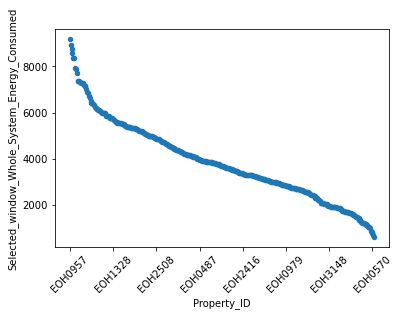

Mean Energy Consumed: 3867.77 kWh in a year.


In [5]:
# Plot scatter plot
ax = df_sorted_consumption.plot(x='Property_ID', y='Selected_window_Whole_System_Energy_Consumed', kind='scatter')

# Set x-ticks to display only every 50th label
step = 50
xticks = df_sorted_consumption['Property_ID'][::step].tolist()
ax.set_xticks(xticks)
plt.xticks(rotation=45)

plt.show()

#show mean energy consumption
mean_energy_consumed = df_sorted_consumption['Selected_window_Whole_System_Energy_Consumed'].mean()
rounded_mean = round(mean_energy_consumed, 2)
print("Mean Energy Consumed:", rounded_mean, 'kWh in a year.')

# Sort data by SPF_H2

In [6]:
df_sorted_SPFH2 = clean_df.sort_values("Selected_window_SPFH2", axis = 0, ascending = False, na_position ='first')

# Select the desired columns from the DataFrame and display it
columns_to_display = list(range(4)) + list(range(12, 15))
#rows_to_display = list(range(350,355)) + list(range(400, 405))
df_selected_columns = df_sorted_SPFH2.iloc[:, columns_to_display]
#df_selected_columns

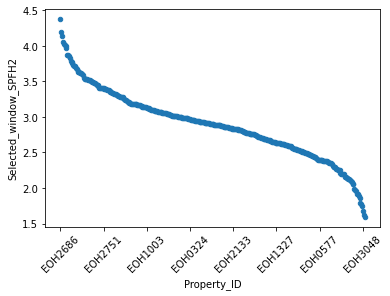

Mean SPF_H2: 2.89


In [7]:
# Plot scatter plot
ax = df_sorted_SPFH2.plot(x='Property_ID', y='Selected_window_SPFH2', kind='scatter')

# Set x-ticks to display only every 50th label
step = 50
xticks = df_sorted_SPFH2['Property_ID'][::step].tolist()
ax.set_xticks(xticks)
plt.xticks(rotation=45)

plt.show()

#show mean energy consumption
mean_SPFH2 = df_sorted_SPFH2['Selected_window_SPFH2'].mean()
rounded_mean = round(mean_SPFH2, 2)
print("Mean SPF_H2:", rounded_mean)

# Energy consumption vs SPFH2

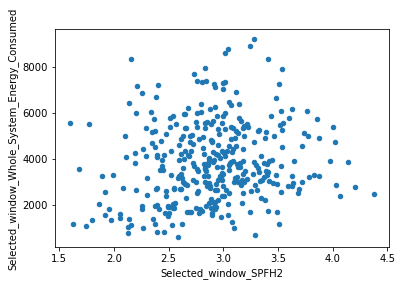

In [8]:
clean_df.plot(x='Selected_window_SPFH2',y='Selected_window_Whole_System_Energy_Consumed', kind='scatter')
plt.show()

# Merge performance data with the design and installation data, matching property ID 

In [9]:
# Upload the file containing data about property, design and installation, found from https://usmart.io/org/esc/discovery/discovery-view-detail/5325ef18-9cd1-493c-beae-e278d8998400 
csv_file_path = "BEIS Electrification of Heat Project - Property, Design and Installation Information.csv"
# Read the CSV file and load data into a DataFrame
properties_df = pd.read_csv(csv_file_path)

In [10]:
# Merge the data collected on the SPF together with the survey data describing the properites of installation 
# and design of the houses. Connect and order the data with matching Property_ID values
merged_df = df.merge(properties_df, on='Property_ID', how='inner')

num_rows = merged_df.shape[0]
num_columns = merged_df.shape[1]
print(f"Number of data rows: {num_rows -1}")
print(f"Number of data columns: {num_columns -1}")

columns_to_display = ['Property_ID', # recognition data
                      'Selected_window_SPFH2', 'Selected_window_SPFH4', # SPF perfromance
                      'Selected_window_Whole_System_Energy_Consumed', 'Selected_window_HP_Energy_Output', # energy consumption
                      'Selected_window_Boiler_Energy_Output', # energy consumption
                      'House_SAP', # house properties
                      'Wall_Type', 'Floor_Type', 'Roof_Type', 'Glazed_Type', # insulation and efficiency data before intervention
                      'TS_Existing', 'TS_Existing_Size', # previosuly existing heating systems
                      'MCS_Hloss', # MCS calculations on heat load and loss
                      'HP_Installed', 'TS_Water_Size', 'TS_PCM_Size', # installed HP and TS system
                      'Measures_Loft', # house interventions for HP installation  
                      'HP_Size_kW', 'Cost_HP']# cost of new system for HP
''' 
# ALL USEFUL PARAMETERS:
columns_to_display = ['Property_ID', 'Included_SPF_analysis', # recognition data
                      'Selected_window_SPFH2', 'Selected_window_SPFH3', 'Selected_window_SPFH4',# SPF perfromance
                      'Selected_window_Whole_System_Energy_Consumed', 'Selected_window_HP_Energy_Output', 'Selected_window_IH_Energy_Consumed', # energy consumption
                      'Selected_window_BUH_Energy_Consumed','Selected_window_CP_Energy_Consumed', 'Selected_window_Boiler_Energy_Output', # energy consumption
                      'Selected_window_mean_SH_flow_temp', 'Selected_window_mean_SH_return_temp', # temperatures of HP input and output
                      'Coldest_day_COPH4', 'Coldest_day_External_Air_Temp_mean', 'Coldest_day_Internal_Air_Temp_mean', # coldest day
                      'HouseIncome', 'HP_Awareness', # consumer information
                      'House_Form', 'House_Age', 'House_SAP', 'Total_Floor_Area', # house properties
                      'Wall_Type', 'Floor_Type', 'Roof_Type', 'Glazed_Type', # insulation and efficiency data before intervention
                      'Main_Fuel', 'Heat_Primary_Source', 'TS_Existing', 'TS_Existing_Size', 'No_Underfloor', # previosuly existing heating systems
                      'Elec_currentuse', 'Gas_currentuse', # previous consumption 
                      'MCS_SHLoad', 'MCS_Hloss', 'MCS_SHAnnual', # MCS calculations on heat load and loss
                      'EstCost_System', 'EstCost_Ancillary', 'EstCost_Running', 'EstCost_Etariff', #costs
                      'HP_Installed','TS_Type', 'TS_Water_Size', 'TS_PCM_Size', # installed HP and TS system
                      'Fires_replaced', 'Cook_Replaced', 'Measures_Loft', 'Measures_Windows', 'Measures_Doors', 'Measures_WI', 'Measures_DP', # house interventions for HP installation  
                      'HP_Size_kW', 'Cost_HP', 'Cost_TS', 'Cost_Install', 'Cost_Emitters', # cost of new system for HP
                      'Cost_LI', 'Cost_WI', 'Cost_Window', 'Cost_Door', 'Cost_DP' ] # cost of house adaptation

'''
# Reminder: SPH2 includes the HP consumption + the pump/fan to make the source heat available
# SPFH3 also includes backup (auxiliary system and immersion heater), SPFH4 also includes the buildings fans or pumps to circulate water/air

merged_df[columns_to_display]

Number of data rows: 741
Number of data columns: 190


,Property_ID,Selected_window_SPFH2,Selected_window_SPFH4,Selected_window_Whole_System_Energy_Consumed,Selected_window_HP_Energy_Output,Selected_window_Boiler_Energy_Output,House_SAP,Wall_Type,Floor_Type,Roof_Type,Glazed_Type,TS_Existing,TS_Existing_Size,MCS_Hloss,HP_Installed,TS_Water_Size,TS_PCM_Size,Measures_Loft,HP_Size_kW,Cost_HP
0,EOH0001,NaN,NaN,NaN,NaN,NaN,E,Cavity_No_insulation,Suspended,Pitched,Double,Water,100,69.00,ASHP,180.0,NaN,No,11.0,5520.11
1,EOH0003,2.725,2.494,3810.99,9205.27,NaN,C,Cavity_Insulated,Solid,Pitched,Double,None,NaN,50.69,ASHP,300.0,NaN,Yes,7.0,5648.00
2,EOH0005,0.548,0.541,3487.37,1886.36,NaN,C,Cavity_Insulated,Suspended,Pitched,Double,None,NaN,66.10,HT_ASHP,200.0,NaN,No,7.0,11215.17
3,EOH0014,NaN,NaN,NaN,NaN,NaN,D,Cavity_Insulated,Suspended,Pitched,Double,None,NaN,66.32,Hybrid,NaN,NaN,Yes,4.0,5912.20
4,EOH0018,4.062,3.820,2383.68,9106.73,4639.62,NaN,Cavity_Insulated,Suspended,Pitched,Double,None,NaN,53.86,Hybrid,NaN,NaN,Yes,4.0,5739.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,EOH3186,3.246,3.212,8917.09,28500.04,NaN,D,Cavity_Insulated,Suspended,Pitched,Double,Water,Normal (90-130l),84.70,ASHP,200.0,NaN,No,14.0,8575.73
738,EOH3188,2.871,2.546,4058.16,10129.15,NaN,NaN,Cavity_Insulated,Suspended,Pitched,Double,None,NaN,78.20,ASHP,200.0,NaN,Yes,11.0,6364.21
739,EOH3196,3.721,3.546,3010.13,10519.86,NaN,D,Cavity_No_insulation,Suspended,Pitched,Double,Water,Normal (90-130l),67.30,ASHP,150.0,NaN,Yes,8.5,7655.16
740,EOH3197,NaN,NaN,NaN,NaN,NaN,C,Solid_No_insulation,Solid,Pitched,Double,Water,200,64.31,HT_ASHP,200.0,NaN,No,10.0,6364.00


In [11]:
'''

count = merged_df['TS_PCM_Size'].notna().sum()
print("Number of data points with non-null 'TS_PCM_Size':", count)

count = (merged_df['Roof_Type'] != 'Pitched').sum()
print("Number of data points with 'Roof_Type' not equal to 'Pitched':", count)

'''

'\n\ncount = merged_df[\'TS_PCM_Size\'].notna().sum()\nprint("Number of data points with non-null \'TS_PCM_Size\':", count)\n\ncount = (merged_df[\'Roof_Type\'] != \'Pitched\').sum()\nprint("Number of data points with \'Roof_Type\' not equal to \'Pitched\':", count)\n\n'

In [12]:
# Create a dataframe that has the merged data, but discarding the homes that had SPF out of range
clean_merged_df= merged_df[merged_df['Included_SPF_analysis'] != False]

num_rows = clean_merged_df.shape[0]
num_columns = clean_merged_df.shape[1]
print('The merged dataframe which includes data in an acceptable SPF range (between 1.5 and 4.5) has:')
print(f"Number of rows: {num_rows -1}")
print(f"Number of columns: {num_columns -1}")

clean_merged_df[columns_to_display]

The merged dataframe which includes data in an acceptable SPF range (between 1.5 and 4.5) has:
Number of rows: 352
Number of columns: 190


,Property_ID,Selected_window_SPFH2,Selected_window_SPFH4,Selected_window_Whole_System_Energy_Consumed,Selected_window_HP_Energy_Output,Selected_window_Boiler_Energy_Output,House_SAP,Wall_Type,Floor_Type,Roof_Type,Glazed_Type,TS_Existing,TS_Existing_Size,MCS_Hloss,HP_Installed,TS_Water_Size,TS_PCM_Size,Measures_Loft,HP_Size_kW,Cost_HP
1,EOH0003,2.725,2.494,3810.99,9205.27,NaN,C,Cavity_Insulated,Solid,Pitched,Double,None,NaN,50.69,ASHP,300.0,NaN,Yes,7.0,5648.00
4,EOH0018,4.062,3.820,2383.68,9106.73,4639.62,NaN,Cavity_Insulated,Suspended,Pitched,Double,None,NaN,53.86,Hybrid,NaN,NaN,Yes,4.0,5739.82
5,EOH0021,3.374,2.826,3195.61,8994.47,NaN,C,Cavity_Insulated,Suspended,Pitched,Double,Water,Large (> 170l),65.80,ASHP,200.0,NaN,No,8.5,8575.74
7,EOH0026,2.836,2.723,5546.33,15002.99,NaN,C,Cavity_Insulated,Suspended,Pitched,Double,Water,110,63.09,ASHP,200.0,NaN,Yes,7.0,5648.01
10,EOH0031,2.926,2.889,6240.99,18028.22,NaN,E,Cavity_Insulated,Suspended,Pitched,Double,Water,Normal (90-130l),84.90,HT_ASHP,200.0,NaN,No,7.0,11215.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,EOH3177,2.793,2.646,6392.86,16774.12,NaN,NaN,Cavity_Insulated,Solid,Pitched,Double,Water,170,57.25,ASHP,250.0,NaN,No,8.5,5677.83
737,EOH3186,3.246,3.212,8917.09,28500.04,NaN,D,Cavity_Insulated,Suspended,Pitched,Double,Water,Normal (90-130l),84.70,ASHP,200.0,NaN,No,14.0,8575.73
738,EOH3188,2.871,2.546,4058.16,10129.15,NaN,NaN,Cavity_Insulated,Suspended,Pitched,Double,None,NaN,78.20,ASHP,200.0,NaN,Yes,11.0,6364.21
739,EOH3196,3.721,3.546,3010.13,10519.86,NaN,D,Cavity_No_insulation,Suspended,Pitched,Double,Water,Normal (90-130l),67.30,ASHP,150.0,NaN,Yes,8.5,7655.16


In [13]:
# Create a dataframe containing merged data with acceptable SPF, which also contains information on SAP
# SAP is the Standard Assessment Procedure, defining the house rating (EPC)
clean_merged_SAP_df = merged_df[(merged_df['Included_SPF_analysis'] != False) & (merged_df['House_SAP'].isin(['A', 'B', 'C', 'D', 'E', 'F', 'G']))]

num_rows = clean_merged_SAP_df.shape[0]
num_columns = clean_merged_SAP_df.shape[1]
print('The merged dataframe which includes data in an acceptable SPF range and with a published SAP has:')
print(f"Number of rows: {num_rows -1}")
print(f"Number of columns: {num_columns -1}")

#clean_merged_SAP_df[columns_to_display]
#NOTE: if add 'NaN', nothing changes in the number of rows -- why???

The merged dataframe which includes data in an acceptable SPF range and with a published SAP has:
Number of rows: 222
Number of columns: 190


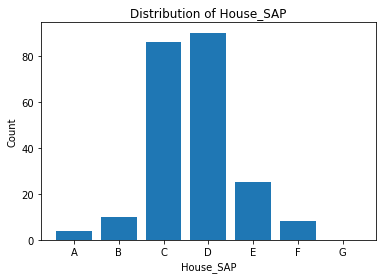

The dataset that containes houses in the acceped SPF range with existing SAP certificate is distributed as below :
Category D: 90 elements
Category C: 86 elements
Category E: 25 elements
Category B: 10 elements
Category F: 8 elements
Category A: 4 elements
The total number of houses in this dataset is 223


In [14]:
# Now let's count the number of itmes with different SAPs
# The value_counts() function returns a Series where the unique values in 'House_SAP' are the index labels and the corresponding counts are the values.
sap_counts = clean_merged_SAP_df['House_SAP'].value_counts()

# Define the categories and display the counts for each SAP value
categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
counts = [sap_counts.get(category, 0) for category in categories]

# Plot the histogram
plt.bar(categories, counts)
plt.xlabel('House_SAP')
plt.ylabel('Count')
plt.title('Distribution of House_SAP')
plt.show()

# Print the exact number of houses that fall in each SAP category
total=0
print('The dataset that containes houses in the acceped SPF range with existing SAP certificate is distributed as below :')
for category, count in sap_counts.items():
    total+=count
    print(f"Category {category}: {count} elements")
print('The total number of houses in this dataset is', total) 

# Consumption wrt house efficiency (SAP)

In [15]:
# Create a dictionary to store the separate DataFrames
SAP_dfs = {}
categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Iterate over each category
for category in categories:
    # Filter the DataFrame based on the category
    category_df = clean_merged_SAP_df[clean_merged_SAP_df['House_SAP'] == category]
    
    # Add the filtered DataFrame to the dictionary
    SAP_dfs[category] = category_df
    
SAP_dfs['A'][columns_to_display]   
#SAP_dfs['B'][columns_to_display]   

,Property_ID,Selected_window_SPFH2,Selected_window_SPFH4,Selected_window_Whole_System_Energy_Consumed,Selected_window_HP_Energy_Output,Selected_window_Boiler_Energy_Output,House_SAP,Wall_Type,Floor_Type,Roof_Type,Glazed_Type,TS_Existing,TS_Existing_Size,MCS_Hloss,HP_Installed,TS_Water_Size,TS_PCM_Size,Measures_Loft,HP_Size_kW,Cost_HP
71,EOH0279,3.696,3.543,2674.04,9356.25,NaN,A,Cavity_Insulated,Solid,Pitched,Double,Water,Normal (90-130l),57.2,ASHP,150.0,NaN,No,8.5,7655.16
89,EOH0346,3.625,3.346,6149.52,19981.77,NaN,A,Solid_No_insulation,Suspended,Pitched,Double,None,NaN,49.4,ASHP,200.0,NaN,No,8.5,8575.73
216,EOH0889,2.396,2.343,2007.80,4628.83,NaN,A,Cavity_Insulated,Suspended,Pitched,Double,Water,150,60.0,ASHP,150.0,NaN,No,5.0,5183.24
597,EOH2549,3.345,3.164,4117.84,12919.39,NaN,A,Cavity_Insulated,Suspended,Pitched,Double,Water,Medium (131-170l),60.0,ASHP,200.0,NaN,No,8.5,8575.73


In [16]:
SAP_dfs['B'][columns_to_display]   

,Property_ID,Selected_window_SPFH2,Selected_window_SPFH4,Selected_window_Whole_System_Energy_Consumed,Selected_window_HP_Energy_Output,Selected_window_Boiler_Energy_Output,House_SAP,Wall_Type,Floor_Type,Roof_Type,Glazed_Type,TS_Existing,TS_Existing_Size,MCS_Hloss,HP_Installed,TS_Water_Size,TS_PCM_Size,Measures_Loft,HP_Size_kW,Cost_HP
41,EOH0172,3.070,2.996,5383.47,16131.43,NaN,B,Cavity_Insulated,Solid,Pitched,Double,Water,Medium (131-170l),79.00,HT_ASHP,200.0,NaN,No,12.0,17943.13
44,EOH0184,2.660,2.654,2300.46,6097.38,NaN,B,Cavity_Insulated,Suspended,Another Dwelling Above,Double,None,NaN,31.00,HT_ASHP,NaN,10.5,No,5.0,11215.18
115,EOH0467,2.893,2.693,1647.00,4287.07,NaN,B,Cavity_No_insulation,Suspended,Pitched,Triple,Water,Normal (90-130l),59.00,ASHP,150.0,NaN,No,5.0,6529.24
126,EOH0516,3.873,3.736,4913.32,18208.21,NaN,B,Cavity_Insulated,Suspended,Pitched,Double,Water,Normal (90-130l),64.80,ASHP,200.0,NaN,No,8.5,8575.74
366,EOH1663,2.868,2.854,3997.79,11408.07,NaN,B,Cavity_Insulated,Solid,Pitched,Double,None,NaN,32.33,HT_ASHP,200.0,NaN,No,7.0,5889.00
482,EOH2088,2.548,2.385,2734.43,6427.99,NaN,B,Cavity_Insulated,Solid,Pitched,Double,Water,110,43.95,ASHP,250.0,NaN,Yes,7.0,5648.01
532,EOH2306,2.111,2.105,4088.36,8605.39,NaN,B,Cavity_Insulated,Suspended,Pitched,Double,Water,Large (> 170l),86.00,HT_ASHP,NaN,10.5,No,12.0,11215.18
681,EOH2953,2.213,2.193,7143.12,15663.17,NaN,B,Cavity_Insulated,Suspended,Pitched,Double,None,NaN,87.00,ASHP,200.0,NaN,No,14.0,8575.73
698,EOH3016,2.569,2.507,5492.98,13770.98,NaN,B,Cavity_Insulated,Solid,Pitched,Double,Water,Large (> 170l),63.80,HT_ASHP,200.0,NaN,No,12.0,17943.14
710,EOH3062,2.895,2.587,1561.19,4039.29,7398.28,B,Cavity_Insulated,Solid,Pitched,Double,None,NaN,90.34,Hybrid,NaN,NaN,Yes,4.0,5739.82


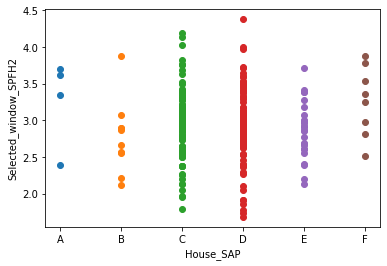

In [17]:
# Iterate over each House_SAP category and create a plot that shows the distribution of SPF values in each SAP category
for category, df_category in SAP_dfs.items():
    plt.scatter(df_category['House_SAP'], df_category['Selected_window_SPFH2'], label=category)

plt.xlabel('House_SAP')
plt.ylabel('Selected_window_SPFH2')
#plt.legend()
#transparency, alpha 0.1
plt.show()

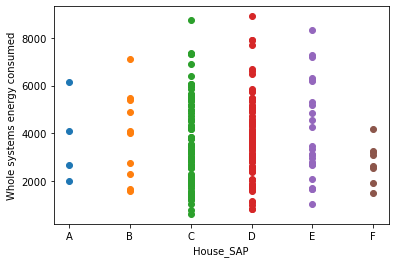

In [18]:
# Iterate over each House_SAP category and create a plot that shows the distribution of system energy consumed values in each SAP category
for category, df_category in SAP_dfs.items():
    plt.scatter(df_category['House_SAP'], df_category['Selected_window_Whole_System_Energy_Consumed'], label=category)

plt.xlabel('House_SAP')
plt.ylabel('Whole systems energy consumed')
#plt.legend()
plt.show()


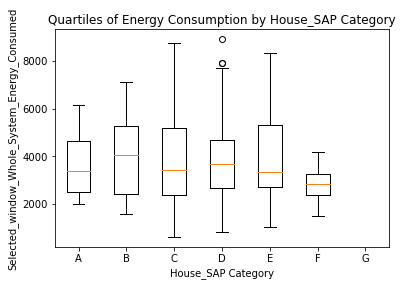

Category A: Mean Selected_window_Whole_System_Energy_Consumed = 3737.3
Category B: Mean Selected_window_Whole_System_Energy_Consumed = 3926.2
Category C: Mean Selected_window_Whole_System_Energy_Consumed = 3768.9
Category D: Mean Selected_window_Whole_System_Energy_Consumed = 3757.9
Category E: Mean Selected_window_Whole_System_Energy_Consumed = 4032.6
Category F: Mean Selected_window_Whole_System_Energy_Consumed = 2788.8
Category G: Mean Selected_window_Whole_System_Energy_Consumed = nan


In [19]:
# Create an empty list to store the quartiles for each SAP category
category_quartiles = []

# Iterate over each House_SAP category, and for each, find its quartile values for system energy consumption
for category, df_category in SAP_dfs.items():
    quartiles = df_category['Selected_window_Whole_System_Energy_Consumed'].quantile([0.25, 0.5, 0.75])
    # Add quartile values to the list
    category_quartiles.append(list(quartiles))   
# print(category_quartiles)

# Prepare the data for plotting
labels = list(SAP_dfs.keys())
data = [df['Selected_window_Whole_System_Energy_Consumed'] for df in SAP_dfs.values()]
#is this correct? should I use the clean_merged_SAP_df dataframe instead?

# Plot the quartiles for each category
fig, ax = plt.subplots()
ax.boxplot(data, labels=labels)
ax.set_xlabel('House_SAP Category')
ax.set_ylabel('Selected_window_Whole_System_Energy_Consumed')
ax.set_title('Quartiles of Energy Consumption by House_SAP Category')
plt.show()

# Iterate over each House_SAP category and calculate the mean system energy consumed
for category, df_category in SAP_dfs.items():
    mean_syst_consumption = df_category['Selected_window_Whole_System_Energy_Consumed'].mean()
    print(f"Category {category}: Mean Selected_window_Whole_System_Energy_Consumed = {round(mean_syst_consumption,1)}")
    
# look at standard deviation, rather than 50th percentile etc.
# house size consfusing factor -- correct for that?
# efficiency, coldest day and consumption

# temperature?

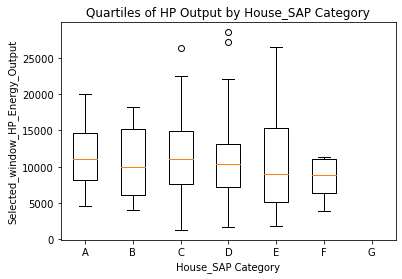

Category A: Mean Selected_window_HP_Energy_Output = 11721.6
Category B: Mean Selected_window_HP_Energy_Output = 10463.9
Category C: Mean Selected_window_HP_Energy_Output = 10742.9
Category D: Mean Selected_window_HP_Energy_Output = 10726.7
Category E: Mean Selected_window_HP_Energy_Output = 11055.9
Category F: Mean Selected_window_HP_Energy_Output = 8346.7
Category G: Mean Selected_window_HP_Energy_Output = nan


In [20]:
# Create an empty list to store the quartiles for each SAP category
category_quartiles = []

# Iterate over each House_SAP category, and for each, find its quartile values for system energy consumption
for category, df_category in SAP_dfs.items():
    quartiles = df_category['Selected_window_HP_Energy_Output'].quantile([0.25, 0.5, 0.75])
    # Add quartile values to the list
    category_quartiles.append(list(quartiles))   
# print(category_quartiles)

# Prepare the data for plotting
labels = list(SAP_dfs.keys())
data = [df['Selected_window_HP_Energy_Output'] for df in SAP_dfs.values()]
#is this correct? should I use the clean_merged_SAP_df dataframe instead?  -------------------------

# Plot the quartiles for each category
fig, ax = plt.subplots()
ax.boxplot(data, labels=labels)
ax.set_xlabel('House_SAP Category')
ax.set_ylabel('Selected_window_HP_Energy_Output')
ax.set_title('Quartiles of HP Output by House_SAP Category')
plt.show()

# Iterate over each House_SAP category and calculate the mean system energy consumed
for category, df_category in SAP_dfs.items():
    mean_syst_consumption = df_category['Selected_window_HP_Energy_Output'].mean()
    print(f"Category {category}: Mean Selected_window_HP_Energy_Output = {round(mean_syst_consumption,1)}")


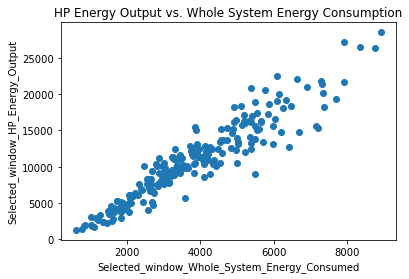

In [21]:
plt.scatter(clean_merged_SAP_df['Selected_window_Whole_System_Energy_Consumed'], clean_merged_SAP_df['Selected_window_HP_Energy_Output'])
plt.xlabel('Selected_window_Whole_System_Energy_Consumed')
plt.ylabel('Selected_window_HP_Energy_Output')
plt.title('HP Energy Output vs. Whole System Energy Consumption')
plt.show()

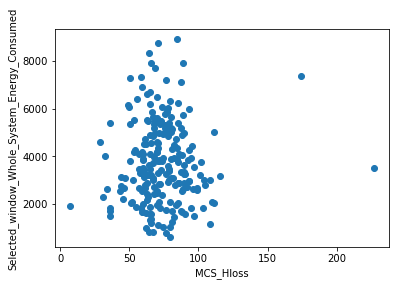

In [22]:
plt.scatter(clean_merged_SAP_df['MCS_Hloss'], clean_merged_SAP_df['Selected_window_Whole_System_Energy_Consumed'])
plt.xlabel('MCS_Hloss')
plt.ylabel('Selected_window_Whole_System_Energy_Consumed')
#plt.title('Selected_window_Whole_System_Energy_Consumed vs. MCS_Hloss')
plt.show()

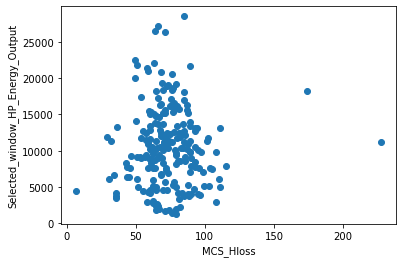

In [23]:
plt.scatter(clean_merged_SAP_df['MCS_Hloss'], clean_merged_SAP_df['Selected_window_HP_Energy_Output'])
plt.xlabel('MCS_Hloss')
plt.ylabel('Selected_window_HP_Energy_Output')
#plt.title('Selected_window_Whole_System_Energy_Consumed vs. MCS_Hloss')
plt.show()


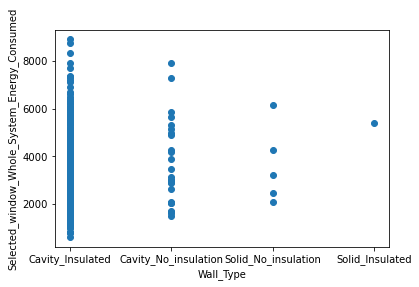

In [24]:
plt.scatter(clean_merged_SAP_df['Wall_Type'], clean_merged_SAP_df['Selected_window_Whole_System_Energy_Consumed'])
plt.xlabel('Wall_Type')
plt.ylabel('Selected_window_Whole_System_Energy_Consumed')
plt.show()

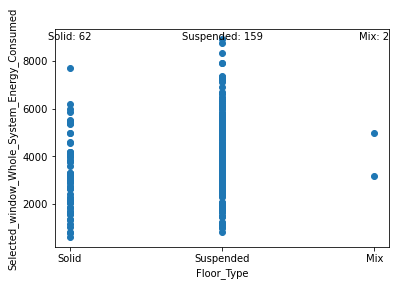

In [25]:
floor_counts = clean_merged_SAP_df['Floor_Type'].value_counts()

plt.scatter(clean_merged_SAP_df['Floor_Type'], clean_merged_SAP_df['Selected_window_Whole_System_Energy_Consumed'])
plt.xlabel('Floor_Type')
plt.ylabel('Selected_window_Whole_System_Energy_Consumed')

# Print the number of items in each category
for floor_type, count in floor_counts.items():
    plt.text(floor_type, clean_merged_SAP_df['Selected_window_Whole_System_Energy_Consumed'].max(), f'{floor_type}: {count}', ha='center')

plt.show()

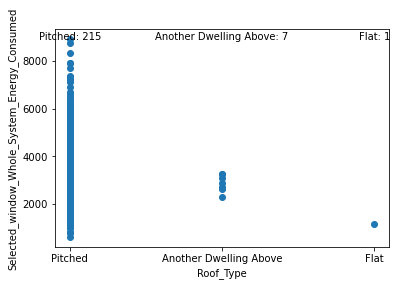

In [26]:

floor_counts = clean_merged_SAP_df['Roof_Type'].value_counts()

plt.scatter(clean_merged_SAP_df['Roof_Type'], clean_merged_SAP_df['Selected_window_Whole_System_Energy_Consumed'])
plt.xlabel('Roof_Type')
plt.ylabel('Selected_window_Whole_System_Energy_Consumed')

# Print the number of items in each category
for floor_type, count in floor_counts.items():
    plt.text(floor_type, clean_merged_SAP_df['Selected_window_Whole_System_Energy_Consumed'].max(), f'{floor_type}: {count}', ha='center')

plt.show()

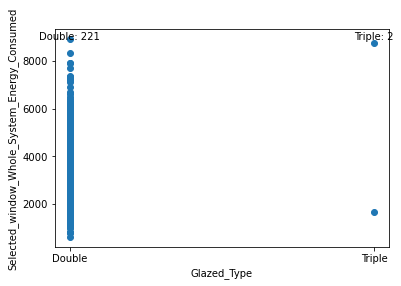

In [27]:

floor_counts = clean_merged_SAP_df['Glazed_Type'].value_counts()

plt.scatter(clean_merged_SAP_df['Glazed_Type'], clean_merged_SAP_df['Selected_window_Whole_System_Energy_Consumed'])
plt.xlabel('Glazed_Type')
plt.ylabel('Selected_window_Whole_System_Energy_Consumed')

# Print the number of items in each category
for floor_type, count in floor_counts.items():
    plt.text(floor_type, clean_merged_SAP_df['Selected_window_Whole_System_Energy_Consumed'].max(), f'{floor_type}: {count}', ha='center')

plt.show()

#EPC might have the share of double or single etc.


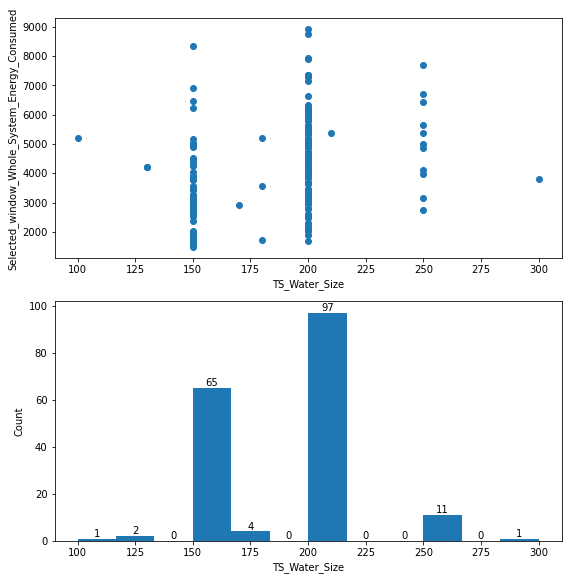

In [28]:
import matplotlib.pyplot as plt

# Create subplots with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Plot the scatter plot
ax1.scatter(clean_merged_SAP_df['TS_Water_Size'], clean_merged_SAP_df['Selected_window_Whole_System_Energy_Consumed'])
ax1.set_xlabel('TS_Water_Size')
ax1.set_ylabel('Selected_window_Whole_System_Energy_Consumed')

# Plot the histogram
ax2.hist(clean_merged_SAP_df['TS_Water_Size'], bins='auto')
ax2.set_xlabel('TS_Water_Size')
ax2.set_ylabel('Count')

# Print the number of items in each category
for rect in ax2.patches:
    count = int(rect.get_height())
    ax2.text(rect.get_x() + rect.get_width() / 2, count, count, ha='center', va='bottom')

plt.tight_layout()
plt.show()


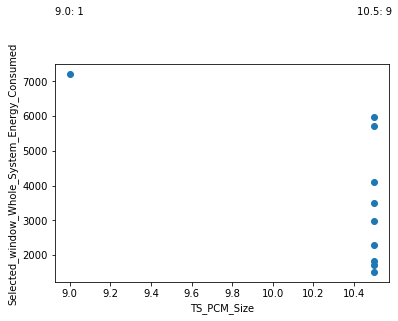

In [29]:
floor_counts = clean_merged_SAP_df['TS_PCM_Size'].value_counts()

plt.scatter(clean_merged_SAP_df['TS_PCM_Size'], clean_merged_SAP_df['Selected_window_Whole_System_Energy_Consumed'])
plt.xlabel('TS_PCM_Size')
plt.ylabel('Selected_window_Whole_System_Energy_Consumed')

for floor_type, count in floor_counts.items():
    plt.text(floor_type, clean_merged_SAP_df['Selected_window_Whole_System_Energy_Consumed'].max(), f'{floor_type}: {count}', ha='center')

plt.show()

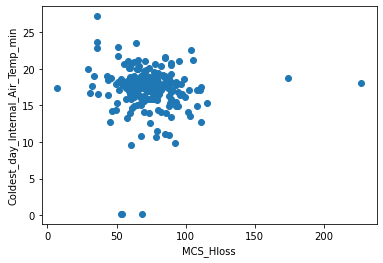

In [30]:
# Plot the scatter plot
plt.scatter(clean_merged_SAP_df['MCS_Hloss'], clean_merged_SAP_df['Coldest_day_Internal_Air_Temp_min'])
plt.xlabel('MCS_Hloss')
plt.ylabel('Coldest_day_Internal_Air_Temp_min')
# Display the plot
plt.show()

# Meeting with philipp 
- Coldest_day_External_Air_Temp_min
- ON glazing: EPC might have the share of double or single etc.
- Consumptino: look at standard deviation, rather than 50th percentile etc.
- Consumptino: house size consfusing factor -- correct for that?
- Consumptino: efficiency, coldest day and consumption




# Coldest day analysis 

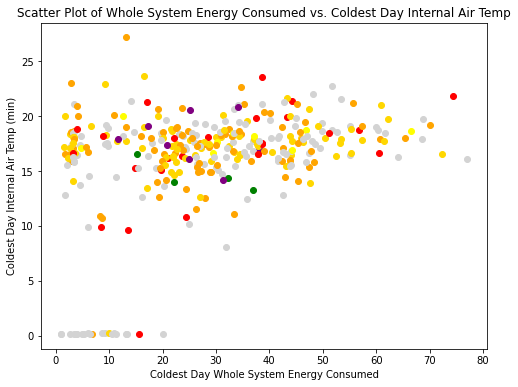

In [38]:
import matplotlib.pyplot as plt

# Define colors for different categories
colors = {'D': 'orange', 'C': 'gold', 'A': 'green', 'B': 'yellow', 'E': 'red', 'F': 'purple', 'G': 'blue'}
default_color = 'lightgrey'

# Plotting the data
plt.figure(figsize=(8, 6))

# Iterate over the rows and plot each point with the corresponding color
for index, row in clean_merged_df.iterrows():
    house_sap = row['House_SAP']
    energy_consumed = row['Coldest_day_Whole_System_Energy_Consumed']
    air_temp = row['Coldest_day_Internal_Air_Temp_min']
    
    color = colors.get(house_sap, default_color)
    plt.scatter(energy_consumed, air_temp, color=color)

plt.xlabel('Coldest Day Whole System Energy Consumed')
plt.ylabel('Coldest Day Internal Air Temp (min)')
plt.title('Scatter Plot of Whole System Energy Consumed vs. Coldest Day Internal Air Temp')

# Display the plot
plt.show()
